Reference:\
Adapted from the companion notebooks for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) by Francois Chollet.


# Working with Keras: A deep dive

In [ ]:
# import libs
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [ ]:
# Clear the current TensorFlow graph
tf.keras.backend.clear_session()

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**TO DO:**\
Question: Why are there "?"s for output shape?\
Answer: ?

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Calling a model for the first time to build it**

In [ ]:
model.build(input_shape=(None, 3))
model.weights

[<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>,
 <KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>,
 <KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>]

In [ ]:
model.layers

[<Dense name=dense_2, built=True>, <Dense name=dense_3, built=True>]

**TO DO:**
1. Print out all the model layers
2. Print out all the model weight specs

In [ ]:
# Print out all the model layers
FILL IN

# Print out all the model weight specs
FILL IN

<Dense name=dense_2, built=True>
<Dense name=dense_3, built=True>
<KerasVariable shape=(3, 64), dtype=float32, path=sequential_1/dense_2/kernel>
<KerasVariable shape=(64,), dtype=float32, path=sequential_1/dense_2/bias>
<KerasVariable shape=(64, 10), dtype=float32, path=sequential_1/dense_3/kernel>
<KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_3/bias>


**The summary method**

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

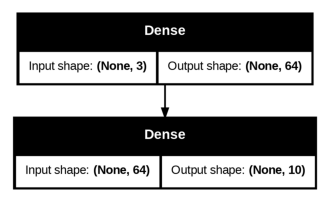

In [ ]:
# Draw the model architecture (graph)
keras.utils.plot_model(model, "seq_model.png", show_shapes=True)

# Load and display the generated image, scaled down
img = mpimg.imread('seq_model.png')
plt.figure(figsize=(4, 3)) # Adjust figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()

**Naming models and layers with the `name` argument**

**TO DO:**
1. Give a name to the model
2. Give a name to the 1st layer
3. Give a name to the 2nd layer

In [ ]:
model = keras.Sequential(**FILL IN**)
model.add(layers.Dense(64, activation="relu", **FILL IN**))
model.add(layers.Dense(10, activation="softmax", **FILL IN**))
model.build((None, 3))
model.summary()

Model: "my_seq_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)               │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ my_last_layer (Dense)                │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Specifying the input shape of your model in advance**

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [ ]:
model.summary()

In [ ]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [ ]:
# Clear the current TensorFlow graph
tf.keras.backend.clear_session()

**TO DO:**\
Convert the above Sequentially defined model to a Functional way of defining the model by filling in the missing parts

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu", name="layer1")**FILL IN**
outputs = layers.Dense(10, activation="softmax", name="output")**FILL IN**
model_fnc = keras.Model(**FILL IN**)

In [ ]:
inputs.dtype

'float32'

In [ ]:
for feature in model_fnc.layers:
  print(feature)

<InputLayer name=my_input, built=True>
<Dense name=layer1, built=True>
<Dense name=output, built=True>


In [ ]:
model_fnc.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)